# Finding vessels opening east and west of Suez

## Run this example in [Colab](https://colab.research.google.com/github/SignalOceanSdk/SignalSDK/blob/master/docs/examples/jupyter/Tonnage%20List%20API/Finding%20vessels%20opening%20east%20and%20west%20of%20Suez.ipynb). 

## Setup
Install the Signal Ocean SDK:

In [ ]:
!pip install signal-ocean

Set your subscription key, acquired here: [https://apis.signalocean.com/profile](https://apis.signalocean.com/profile)

In [12]:
signal_ocean_api_key = '' #replace with your subscription key

## Example 1: Number of spot and relet vessels over time
In this example, a supply trend is generated in order to calculate the number of spot and relet vessels which open in specific areas. A time period of 5 days is explored here but this number can go up until the date you subscribed to The Signal Ocean Platform.

First, get a historical tonnage list containing the relevant data:

In [13]:
from datetime import date, timedelta
from signal_ocean import Connection
from signal_ocean.tonnage_list import (
    TonnageListAPI,
    VesselClassFilter,
    PortFilter,
    VesselFilter,
    MarketDeployment,
    VesselSubclass,
    DateRange
)

connection = Connection(signal_ocean_api_key)
api = TonnageListAPI(connection)

vessel_class_filter = VesselClassFilter(name_like="aframax")
vessel_class = api.get_vessel_classes(vessel_class_filter)[0]

port_filter = PortFilter(name_like="ceyhan")
port = api.get_ports(port_filter)[0]

laycan_end_in_days = 512
start_date = date.today() - timedelta(days=5)
end_date = date.today()

historical_tonnage_list = api.get_historical_tonnage_list(
    port,
    vessel_class,
    laycan_end_in_days,
    DateRange(start_date, end_date))


Then, convert the data to a data frame, filter, and plot:

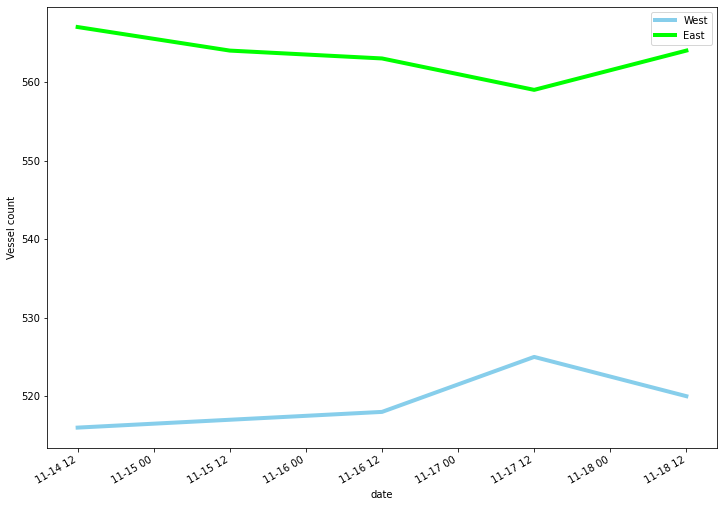

In [14]:
from signal_ocean.tonnage_list import IndexLevel

data_frame = historical_tonnage_list.to_data_frame()
open_wide_area_west_of_suez = [
"Caribs",
"UK Continent",
"Mediterranean",
"West Africa",
"Black Sea / Sea Of Marmara",
"North Sea",
"Baltic",
"South East Africa",
"East Coast Canada",
"US Atlantic Coast",
"West Coast Central America",
"US Gulf & Mainland",
"East Coast Mexico",
"East Coast Central America"
]

open_wide_area_east_of_suez = [
    "South East Asia",
"Arabian Gulf",
"Red Sea",
"Korea / Japan",
"India / Pakistan",
"South East Africa",
"China / Taiwan",
"West Coast Central America",
"Australia / New Zealand",
"Russian Pacific",
"West Coast South America",
"West Coast North America",
"Pacific Islands"
]
west_areas_filter = data_frame.open_wide_area_point_in_time.isin(
    open_wide_area_west_of_suez
)


east_areas_filter = data_frame.open_wide_area_point_in_time.isin(
    open_wide_area_east_of_suez
)

west_vessels = (
    data_frame[west_areas_filter]
    .groupby(IndexLevel.DATE, sort=True)
    .size()
)

east_vessels = (
    data_frame[east_areas_filter]
    .groupby(IndexLevel.DATE, sort=True)
    .size()
)

ax = west_vessels.plot(
    markerfacecolor="blue",
    color="skyblue",
    linewidth=4,
    label="West",
    figsize=(12, 9),
)
ax2 = east_vessels.plot(
    ax=ax,
    markerfacecolor="darkgreen",
    color="lime",
    linewidth=4,
    label="East",
    figsize=(12, 9),
)

ax2.set_ylabel("Vessel count")
ax2.legend()
